# import the library that holds all the necessary functions

In [1]:
from pfss_notebook_lib import *

# set the necessary variables for getting an hmi map

In [2]:
filepath= os.getcwd() #"/home/chospa/solar_mach/pfss/"

email = "chospa@utu.fi"

carrington_rot = 2250

#dateformat: YYYY/MM/DD
date = '2021/10/09'

#----User need not touch the function call---------------------
hmimap = get_pfss_hmimap(filepath, email, carrington_rot, date)

Searching for PFSS file from /home/chospa/Documents/Github/sub_pfss_analysis_notebook
Found pickled PFSS file!


# settings for producing the logarithmic interplanetary map of objects and corresponding magnetic field lines tracing first back to the potential field source surface, and then down to photosphere

# Either load a csv from Solar-MACH output...

In [3]:
csvfile = "Solar-MACH_2021-10-09_06-30-00.csv"

#sc parameters from Solar-MACH
names, sw, distance, lon, lat = get_sc_data(csvfile)

#title of the figure
title = date.replace('/','-')

#produce additional dummy field lines in a ring around the pfss footpoint and how many
vary = False
n_varies = 1

#boolean save switch
save = False

# ... or fill the observables manually:

In [16]:
#names of the object(s) (optional)
names = ['Stereo A']

#solar wind speeds at the objects in km/s
sw = [376]

#distance to the objects in km
distance = au_to_km([0.9583])

#carrington longitude of the objects
lon = [232.716]

#carrington latitude of the objects
lat = [7.169]

#title of the figure
title = date.replace('/','-')

#produce additional dummy field lines in a ring around the pfss footpoint and how many
vary = True
n_varies = 3

#boolean save switch
save = False

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


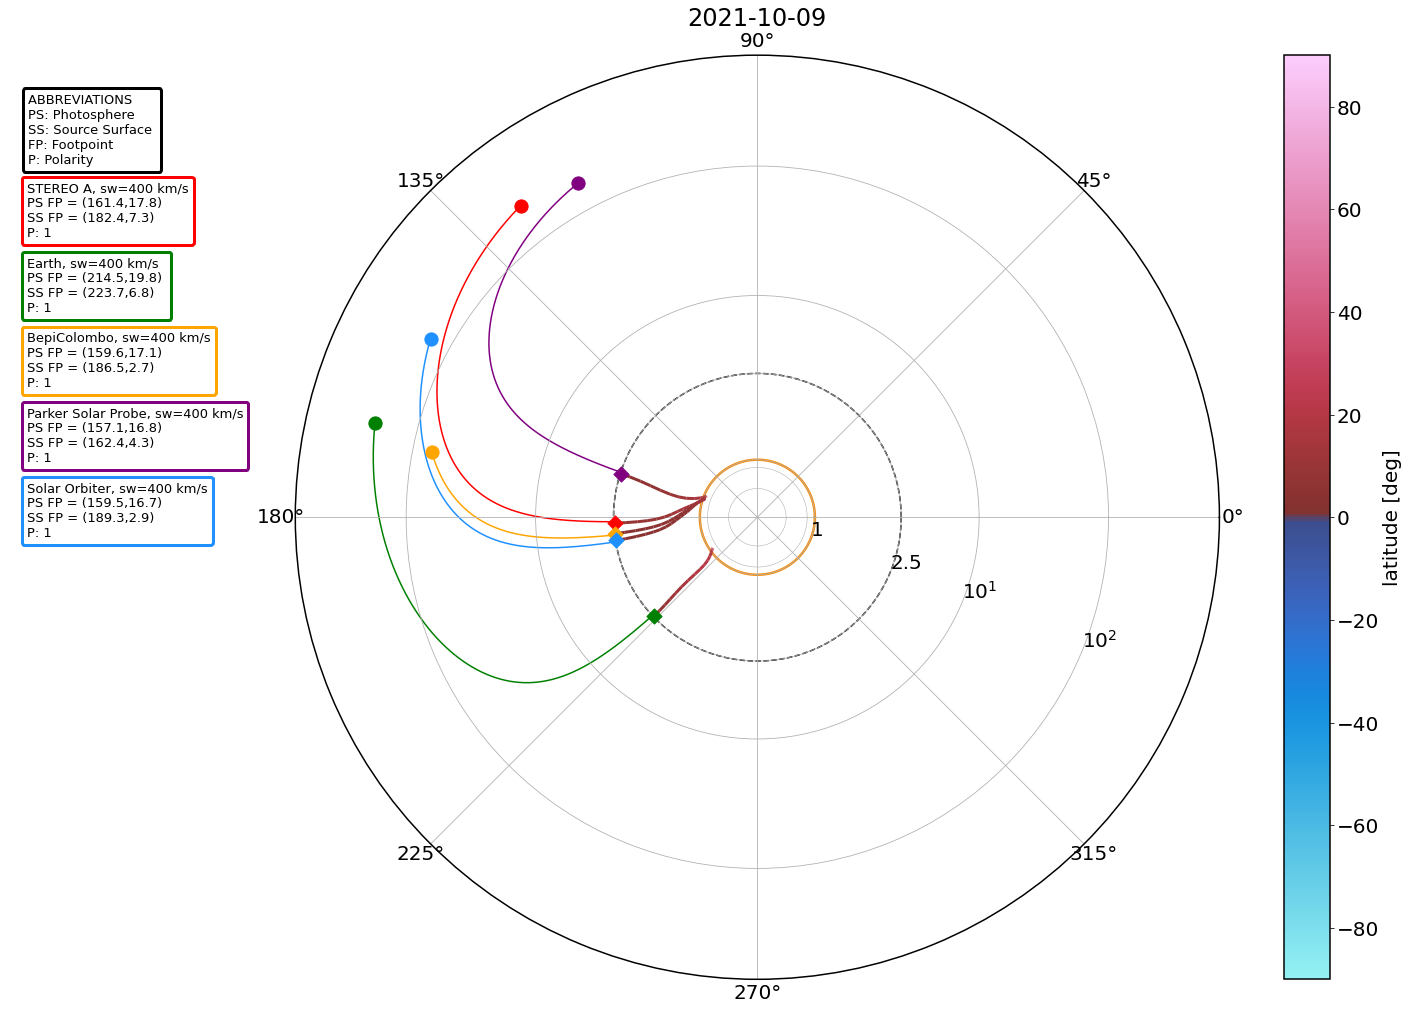

In [4]:
#No need to touch the function call; just run the cell
#----------------------------------------------------------
flines = symlog_pspiral(sw=sw, distance=distance, longitude=lon, latitude=lat, hmimap=hmimap, names=names, title=title, 
                        vary=vary, n_varies=n_varies, save=save)

# The preceding cell returns all the traced sub-pfss field lines, and this function plots them as either xy, xz or yz projection

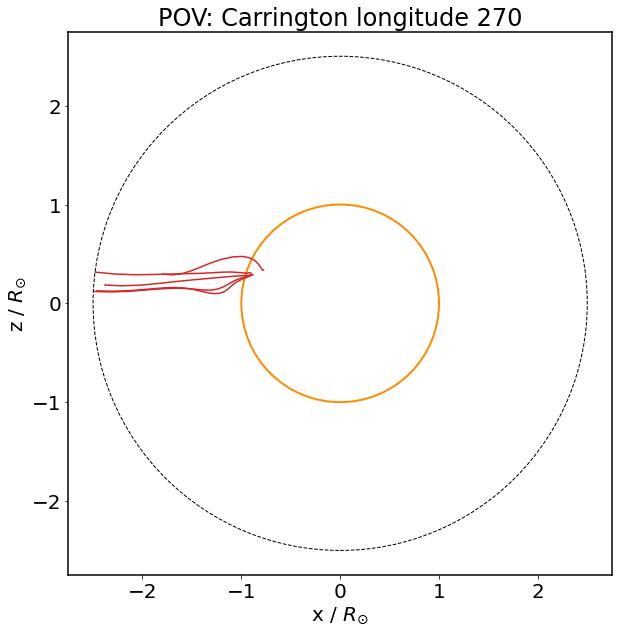

In [8]:
#Choose either xy, xz or yz:
projection = 'xz'

#-----------------------------------------------------------
draw_fieldlines(flines, frame=projection, names=names)

# Inspect sub-pfss field lines in 3D mode

<IPython.core.display.Javascript object>


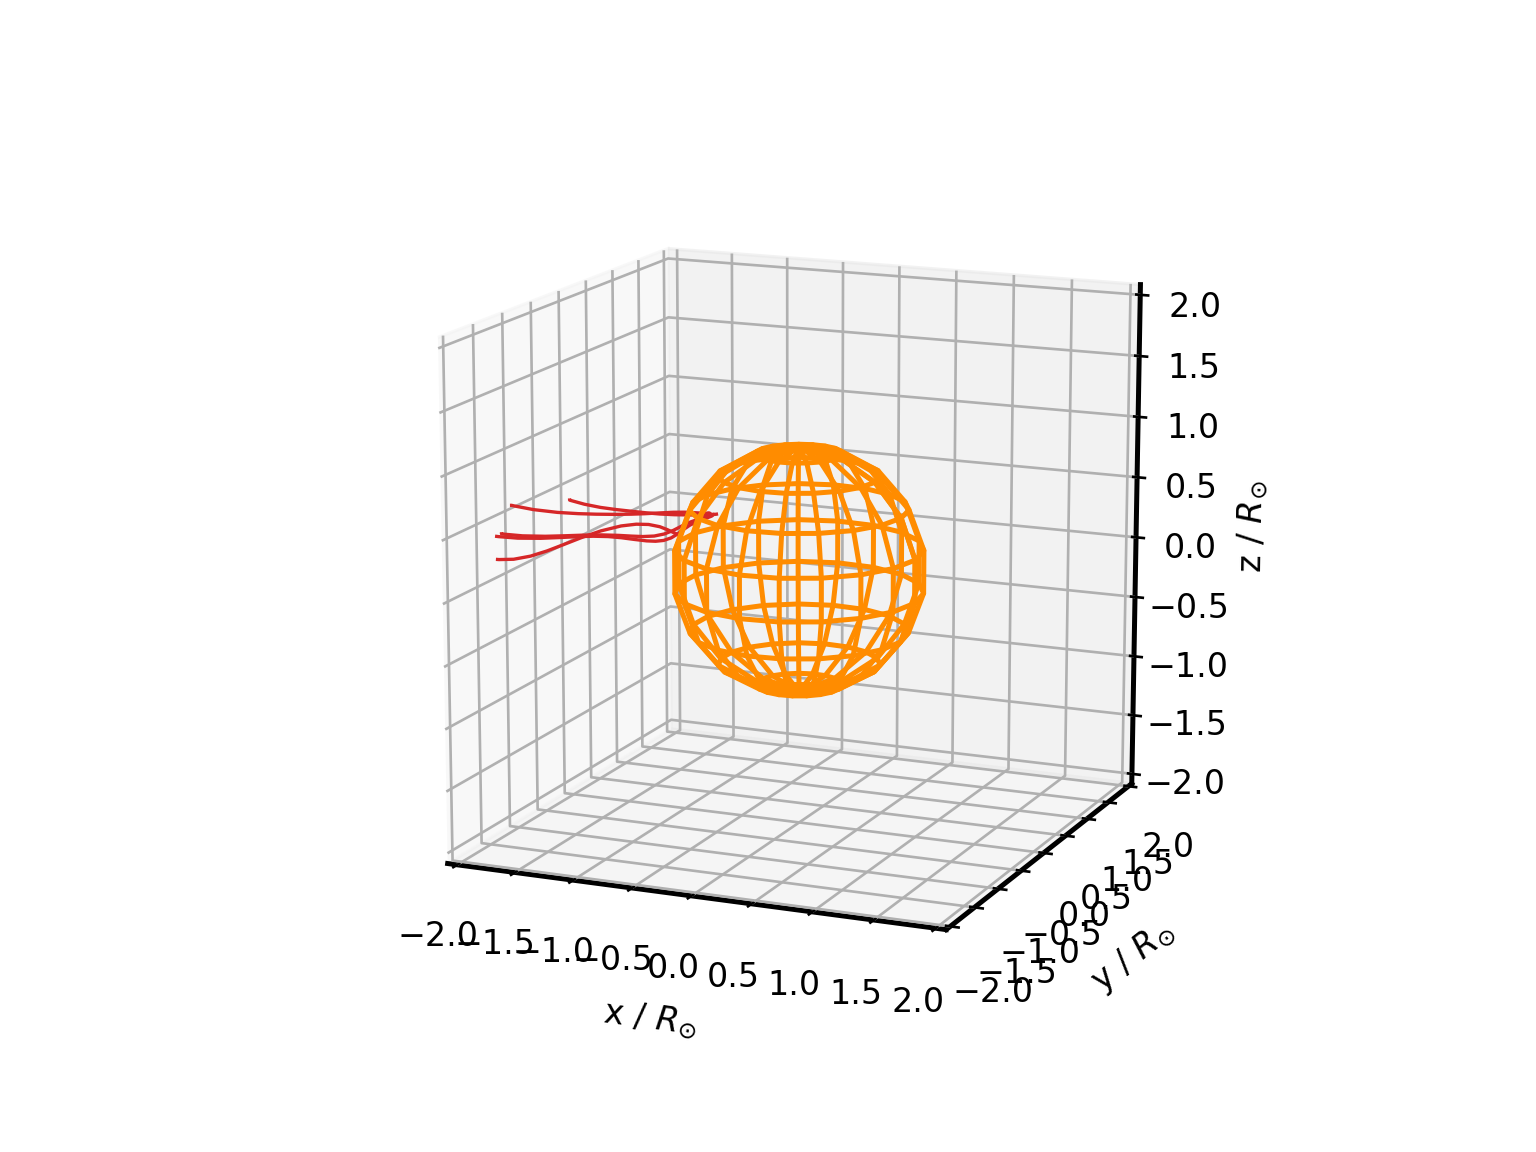

In [9]:
%matplotlib notebook
plot3d(flines, names)

Reset the matplotlib parameters after interactive "notebook" mode

In [10]:
%matplotlib inline
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.size'] = 20
plt.rcParams['agg.path.chunksize'] = 20000

# field_line_accuracy() calculates the central point (the mean of all points) for photospheric footpoints, the average distance from the central point and the standard deviation of longitudes and latitudes

In [11]:
footpoint_coords, central_point, avg_distance, stds = field_line_accuracy(flines)
print(central_point)
print(avg_distance)
print(stds)

[170.4374270964363, 17.615895227861124]
0.29287958369651923
[22.0962937313344, 1.1482966919156288]


Plot the photospheric footpoints on a flat 2D surface. Use zoom=box_dims to zoom in to the central point

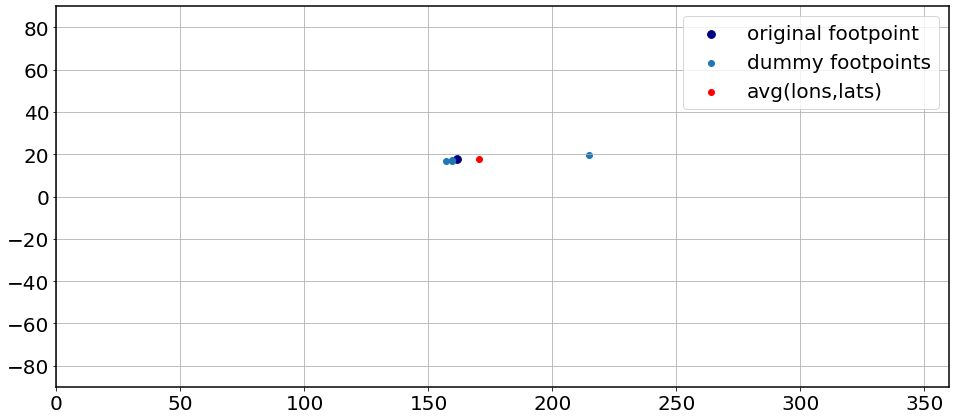

In [12]:
map_on_surface(footpoint_coords, central_point, avg_distance, 
               zoom=None, show_avg_d=False)

# Finally, one may save field line information into a csv

In [11]:
filename = "magnetic_info"
write_info_to_csv(flines, names, filename)

Created file magnetic_info.csv to /home/chospa/solar_mach/pfss/
